# Fast Convolution

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* Filtering using the overlap-add method

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import librosa
import librosa.display
import IPython.display as ipd

Load and display wave file

In [2]:
wave_filename = '../audio/33711__acclivity__excessiveexposure.wav'
#wave_filename = '../audio/E-Core - Pingouin-Banquise_45s.wav'
#wave_filename = '../audio/KIMIKO ISHIZAKA - Goldberg Variations BWV 988 - 01 - Aria_45s.wav'
x, sampling_rate = librosa.load(wave_filename)

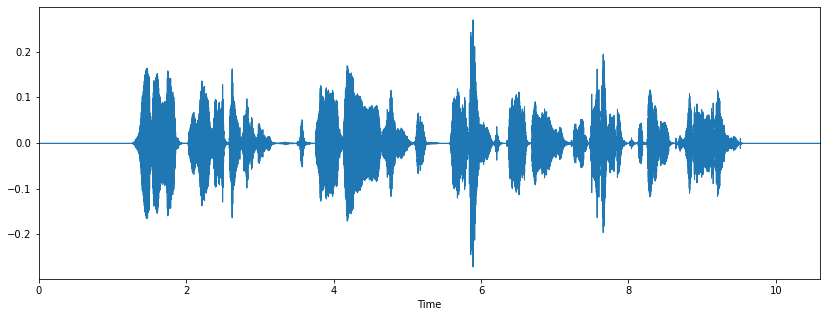

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sampling_rate)

In [23]:
ipd.Audio(x, rate=sampling_rate)

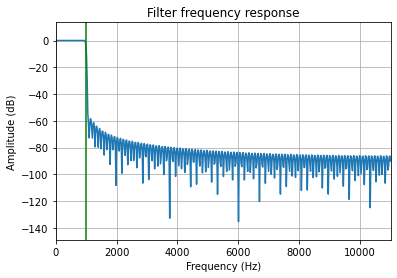

In [112]:
# define low-pass FIR filter 
# number of coefficients
N_taps = 800

# Cutoff frequency, remove everything above 2 KhZ
f_cutoff = 1000

# note that the cutoff frequency is normalized to the Nyquist frequency
taps = firwin(N_taps, f_cutoff/(sampling_rate/2))
w, h = signal.freqz(taps, fs=sampling_rate)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Filter frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(f_cutoff, color='green') # cutoff frequency
plt.show()

In [113]:
# carry out filter as a reference
y = np.convolve(x, taps)

In [114]:
ipd.Audio(y, rate=sampling_rate)

In [115]:
# Filtering using overlap add
L_h = len(taps)
L = 1000  # length of blocks of signal x
M = int(np.power(2,np.ceil(np.log2(L_h + L - 1))))
print('M = %d ... L_h + L -1  = %d' % (M,L+L_h-1))

frames = int(np.floor(len(x) / L))

x_lpad = np.zeros(M)
h_pad = np.zeros(M)
h_pad[:L_h] = taps
H = np.fft.fft(h_pad)   # compute DFT

y_overlap_add = np.zeros(frames*L+(M-L))

for l in range(frames):   
    x_l = x[np.arange(L)+l*L]
    x_lpad[:L] = x_l
    X_l = np.fft.fft(x_lpad)
    # multiplication in spectrum
    Y_l = np.multiply(X_l, H)
    y_l = np.fft.ifft(Y_l)
    
    # carry out actual overlap-add
    y_overlap_add[np.arange(M) + l*L] += np.real(y_l)

M = 2048 ... L_h + L -1  = 1799


In [116]:
ipd.Audio(y_overlap_add, rate=sampling_rate)

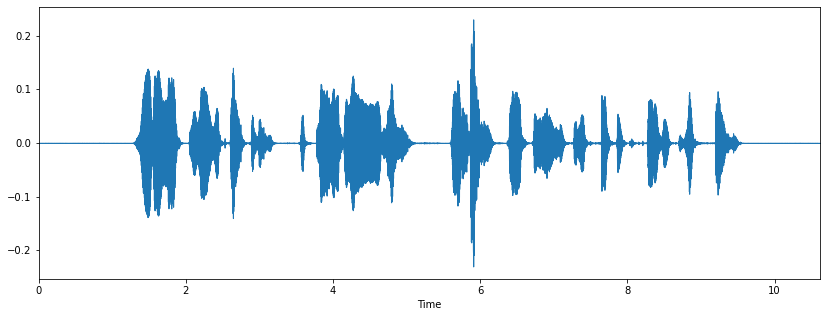

In [117]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y_overlap_add, sr=sampling_rate)